In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/ismetsemedov/transactions

- transaction_id: Unique identifier for each transaction.

- customer_id: Unique identifier for each customer in the dataset.

- card_number: Masked card number associated with the transaction.

- timestamp: Date and time of the transaction.

- merchant_category: General category of the merchant (e.g., Retail, Grocery, Travel).

- merchant_type: Specific type within the merchant category (e.g., "online" for Retail).

- merchant: Name of the merchant where the transaction took place.

- amount: Transaction amount (currency based on the country).

- currency: Currency used for the transaction (e.g., USD, EUR, JPY).

- country: Country where the transaction occurred.

- city: City where the transaction took place.

- city_size: Size of the city (e.g., medium, large).

- card_type: Type of card used (e.g., Basic Credit, Gold Credit).

- card_present: Indicates if the card was physically present during the transaction (used in POS transactions).

- device: Device used for the transaction (e.g., Chrome, iOS App, NFC Payment).

- channel: Type of channel used for the transaction (web, mobile, POS).

- device_fingerprint: Unique fingerprint for the device used in the transaction.

- ip_address: IP address associated with the transaction.

- distance_from_home: Binary indicator showing if the transaction occurred outside the customer's home country.

- high_risk_merchant: Indicates if the merchant category is known for higher fraud risk (e.g., Travel, Entertainment).

- transaction_hour: Hour of the day when the transaction was made.

- weekend_transaction: Boolean indicating if the transaction took place on a weekend.

- velocity_last_hour:
Dictionary containing metrics on the transaction velocity, including:
num_transactions: Number of transactions in the last hour for this customer.
total_amount: Total amount spent in the last hour.
unique_merchants: Count of unique merchants in the last hour.
unique_countries: Count of unique countries in the last hour.
max_single_amount: Maximum single transaction amount in the last hour.

- is_fraud: Binary indicator showing if the transaction is fraudulent (True for fraudulent transactions, False for legitimate ones).

In [23]:
# Load the synthetic data
df_data = pd.read_csv('../DAta/synthetic_fraud_data.csv')

In [24]:
df_data.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,...,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [25]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dty

In [26]:
#null values
df_data.isnull().sum()

transaction_id         0
customer_id            0
card_number            0
timestamp              0
merchant_category      0
merchant_type          0
merchant               0
amount                 0
currency               0
country                0
city                   0
city_size              0
card_type              0
card_present           0
device                 0
channel                0
device_fingerprint     0
ip_address             0
distance_from_home     0
high_risk_merchant     0
transaction_hour       0
weekend_transaction    0
velocity_last_hour     0
is_fraud               0
dtype: int64

In [27]:
#max and min values of amount
print('Max amount:', df_data['amount'].max(),'\nMin amount:',df_data['amount'].min())

Max amount: 6253152.62 
Min amount: 0.01


In [28]:
#create binns for amount from 0 to 7,000,000
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 7000000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000-500000', '500000-1000000','+1000000']
df_data['amount_binned'] = pd.cut(df_data['amount'], bins=bins, labels=labels, include_lowest=True)
# Count the number of transactions in each bin
amount_counts = df_data['amount_binned'].value_counts().sort_index()


In [53]:
# list
columns = ['merchant_category', 'amount_binned', 'distance_from_home','city','card_type','device','channel','amount_binned']


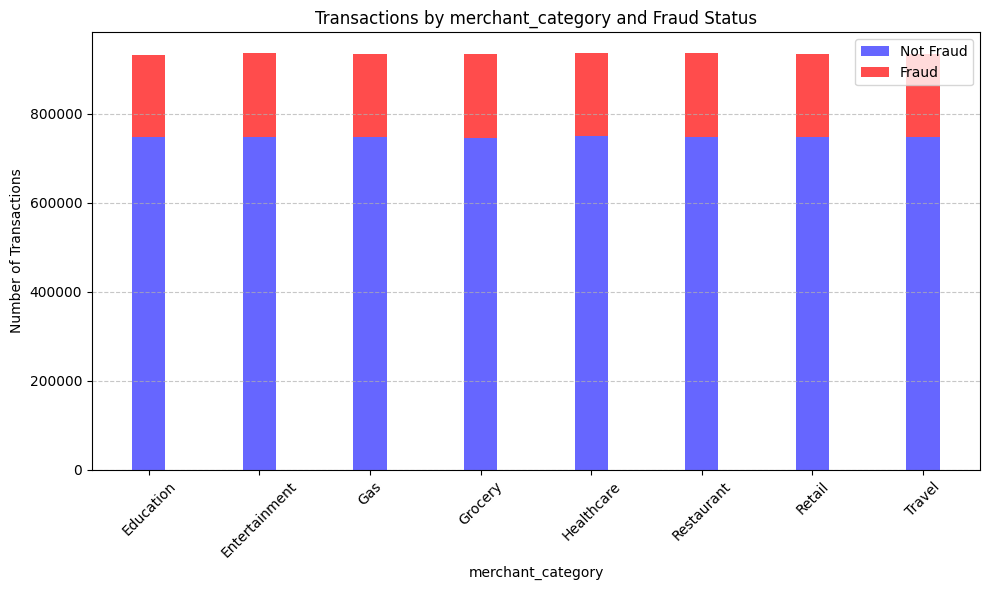

C:\Users\Bjsan\AppData\Local\Temp\ipykernel_2556\2982989051.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_data.groupby([col, 'is_fraud']).size().unstack(fill_value=0)


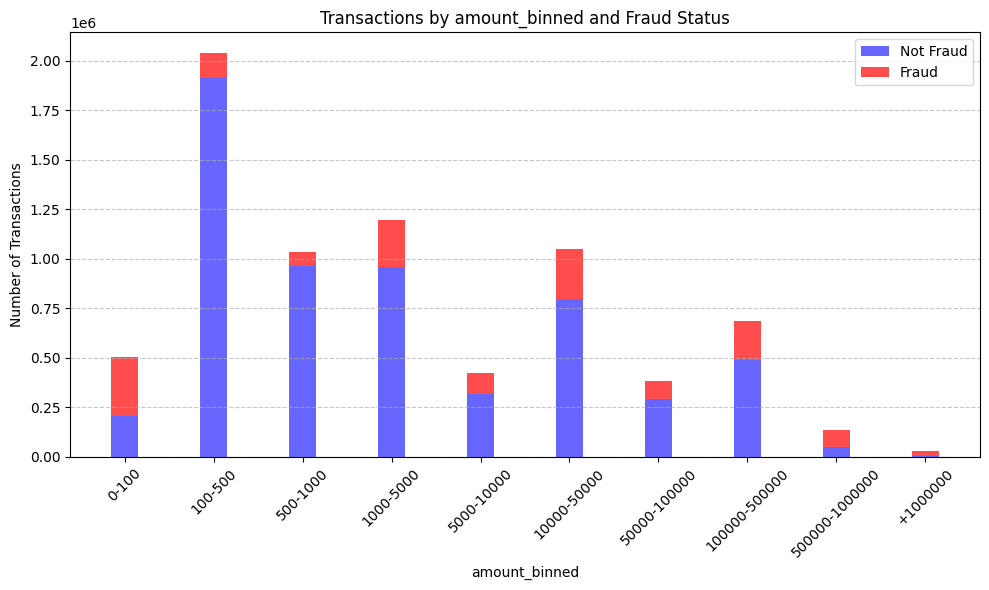

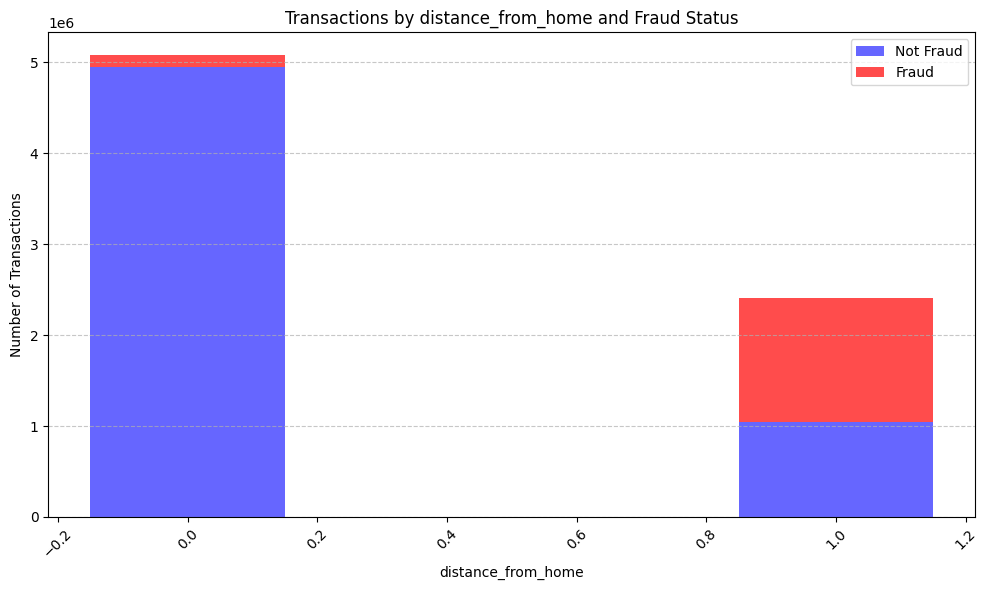

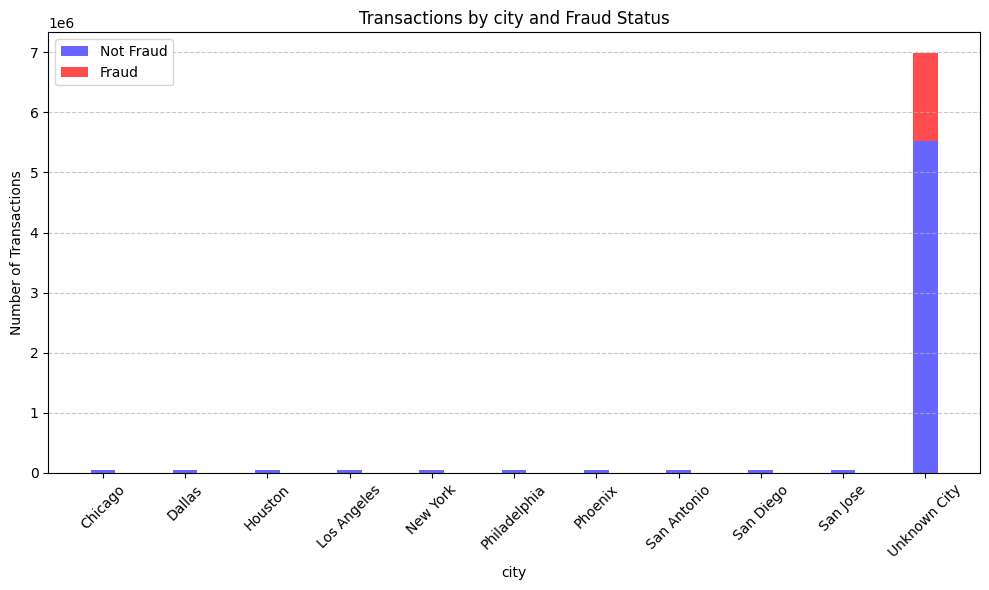

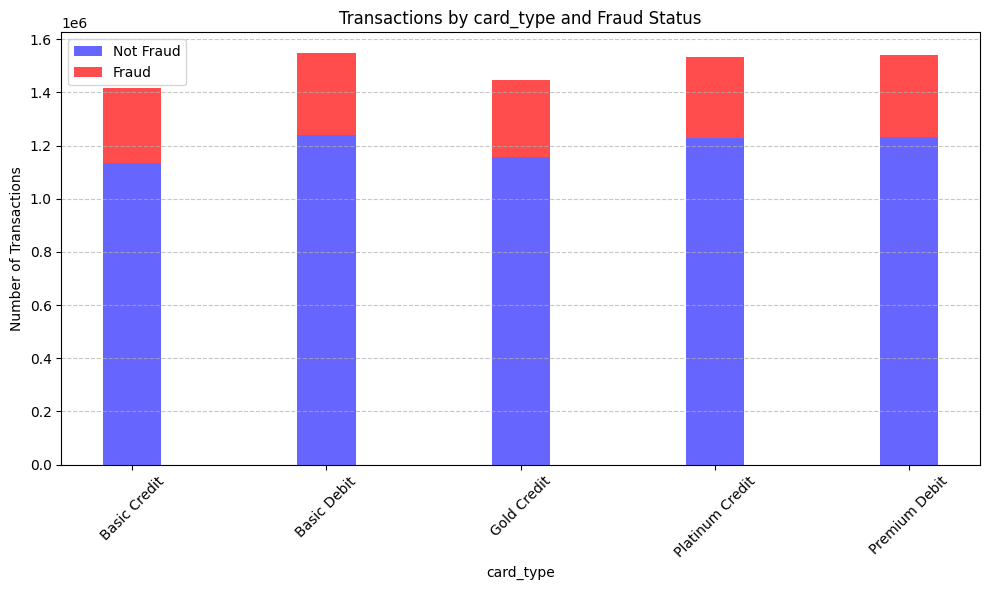

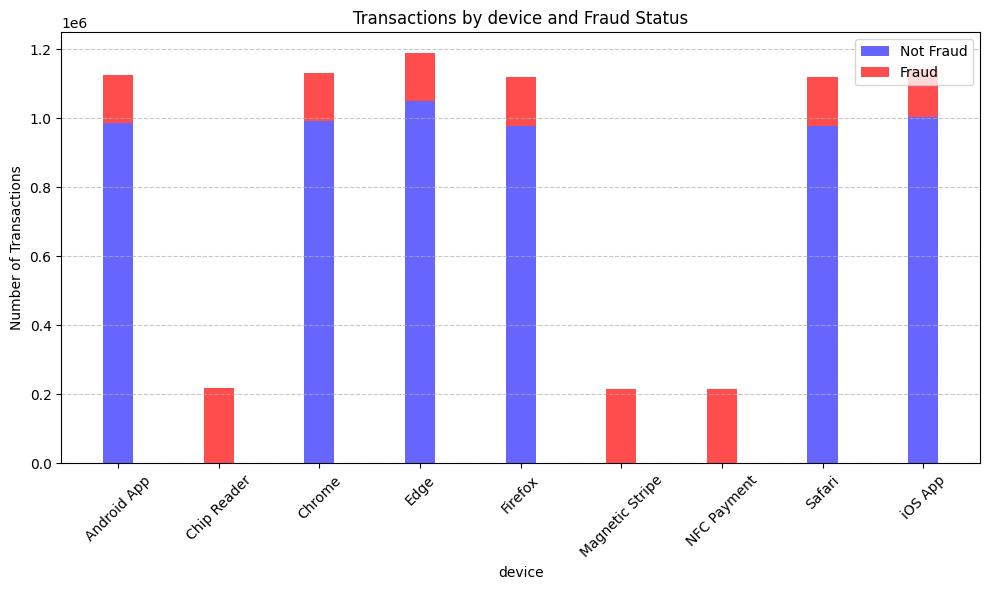

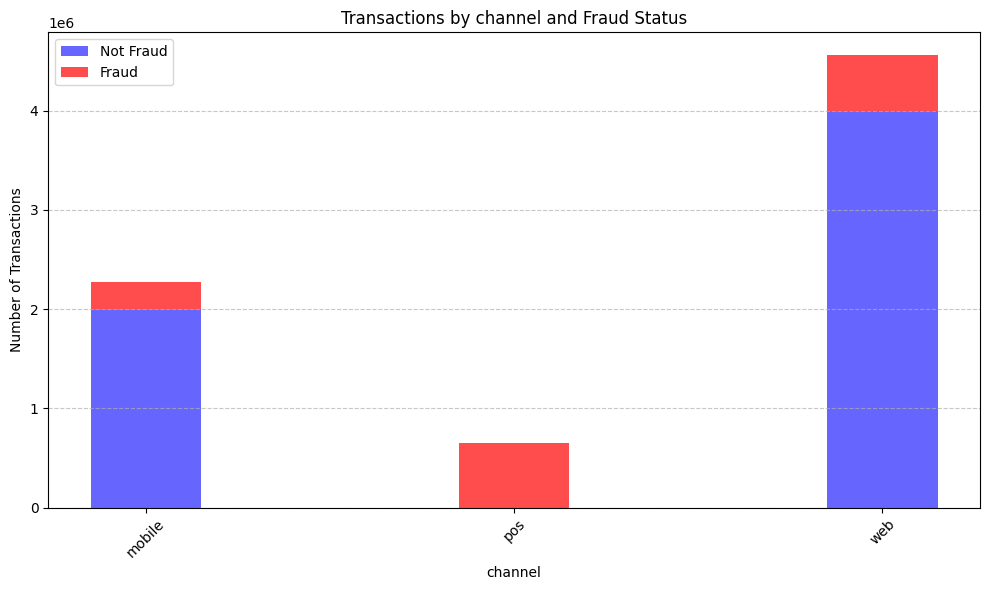

C:\Users\Bjsan\AppData\Local\Temp\ipykernel_2556\2982989051.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_data.groupby([col, 'is_fraud']).size().unstack(fill_value=0)


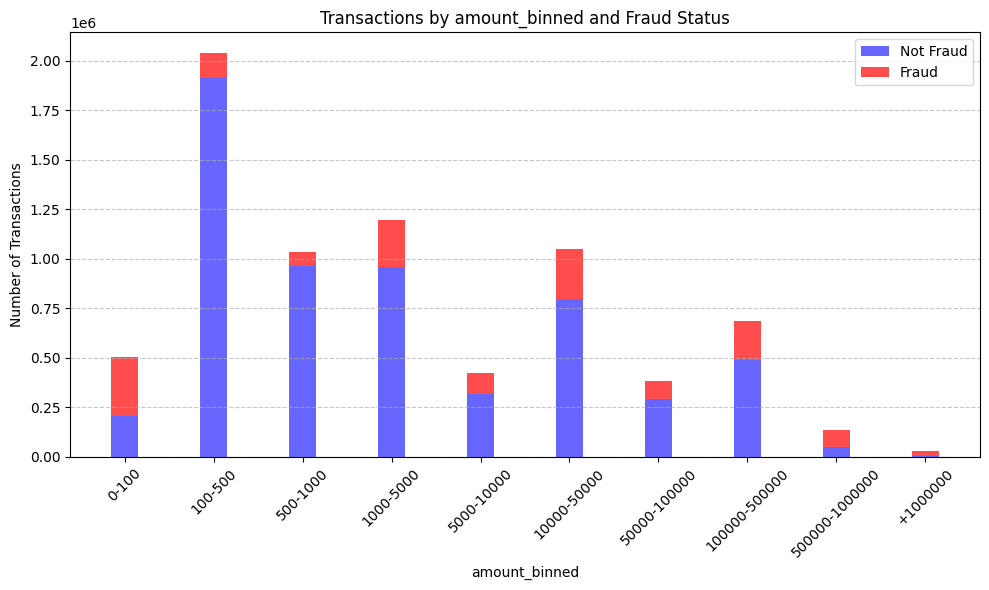

In [54]:
for col in columns:
    grouped = df_data.groupby([col, 'is_fraud']).size().unstack(fill_value=0)

    plt.figure(figsize=(10, 6))
    plt.bar(grouped.index, grouped[False], label='Not Fraud', color='blue', alpha=0.6, width=0.3)
    plt.bar(grouped.index, grouped[True], bottom=grouped[False], label='Fraud', color='red', alpha=0.7, width=0.3)
    plt.xlabel(col)
    plt.ylabel('Number of Transactions')
    plt.title(f'Transactions by {col} and Fraud Status')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()